#### Análisis exploratorio de datos sobre la violencia criminal en Honduras

In [1]:
# Cargamos las librerias necesarias para realizar el análisis exploratorio

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargamos la base de datos general de UNOCD y se realiza una primera revision del dataset

datos = pd.read_excel('datasets/data_cts_intentional_homicide.xlsx', skiprows=2)
datos.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
0,ARM,Armenia,Asia,Western Asia,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,35.0,CTS
1,CHE,Switzerland,Europe,Western Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,28.0,CTS
2,COL,Colombia,Americas,Latin America and the Caribbean,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,15053.0,CTS
3,CZE,Czechia,Europe,Eastern Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,69.0,CTS
4,DEU,Germany,Europe,Western Europe,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,455.0,CTS


Únicamente nos interesa Honduras. Entonces, realizaremos un filtrado por país para solo obtener datos de HND.

In [3]:
datos = datos[datos['Iso3_code'] == 'HND'].reset_index(drop=True)
datos.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
0,HND,Honduras,Americas,Latin America and the Caribbean,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2013,Counts,905.0,CTS
1,HND,Honduras,Americas,Latin America and the Caribbean,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2014,Counts,1319.0,CTS
2,HND,Honduras,Americas,Latin America and the Caribbean,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2015,Counts,1879.0,CTS
3,HND,Honduras,Americas,Latin America and the Caribbean,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2016,Counts,1682.0,CTS
4,HND,Honduras,Americas,Latin America and the Caribbean,Persons arrested/suspected for intentional hom...,by citizenship,National citizens,Male,Total,2019,Counts,1561.0,CTS


In [4]:
len(datos)

1634

In [5]:
datos.nunique()

Iso3_code                 1
Country                   1
Region                    1
Subregion                 1
Indicator                 5
Dimension                 6
Category                 24
Sex                       3
Age                      11
Year                     31
Unit of measurement       2
VALUE                  1087
Source                    3
dtype: int64

In [6]:
datos['Indicator'].value_counts()

Indicator
Victims of intentional homicide                        1208
Persons arrested/suspected for intentional homicide     338
Victims of intentional homicide – City-level data        58
Death due to intentional homicide in prison              16
Persons convicted for intentional homicide               14
Name: count, dtype: int64

In [7]:
homicidios_hnd = datos[datos['Indicator'] == 'Victims of intentional homicide']
homicidios_hnd.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
32,HND,Honduras,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,1990,Counts,495.532800,RSC/Interpol/OCAVI/NSO/CTS
33,HND,Honduras,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,1991,Counts,703.793238,RSC/Interpol/OCAVI/NSO/CTS
34,HND,Honduras,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,1992,Counts,955.106152,RSC/Interpol/OCAVI/NSO/CTS
35,HND,Honduras,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,1993,Counts,1252.522760,RSC/Interpol/OCAVI/NSO/CTS
36,HND,Honduras,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,1994,Counts,1682.445375,RSC/Interpol/OCAVI/NSO/CTS


In [8]:
homicidios_hnd[['Dimension', 'Category', 'Sex', 'Age', 'Year']].value_counts()

Dimension                       Category                                             Sex     Age      Year
Total                           Total                                                Female  0-9      2013    2
by relationship to perpetrator  Intimate partner or family member: Intimate partner  Male    Total    2022    2
                                                                                     Female  Total    2015    2
                                                                                                      2016    2
                                                                                                      2017    2
                                                                                                             ..
Total                           Total                                                Male    Unknown  2013    1
                                                                                                      2014   

In [9]:
hmcds_total = homicidios_hnd[
    (homicidios_hnd['Dimension'] == 'Total') &
    (homicidios_hnd['Category'] == 'Total') &
    (homicidios_hnd['Sex'] == 'Total') &
    (homicidios_hnd['Age'] == 'Total') &
    (homicidios_hnd['Unit of measurement'] == 'Counts')
].reset_index(drop=True)

In [10]:
hmcds_total.head()

,Iso3_code,Country,Region,Subregion,Indicator,Dimension,Category,Sex,Age,Year,Unit of measurement,VALUE,Source
0,HND,Honduras,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,1990,Counts,495.532800,RSC/Interpol/OCAVI/NSO/CTS
1,HND,Honduras,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,1991,Counts,703.793238,RSC/Interpol/OCAVI/NSO/CTS
2,HND,Honduras,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,1992,Counts,955.106152,RSC/Interpol/OCAVI/NSO/CTS
3,HND,Honduras,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,1993,Counts,1252.522760,RSC/Interpol/OCAVI/NSO/CTS
4,HND,Honduras,Americas,Latin America and the Caribbean,Victims of intentional homicide,Total,Total,Total,Total,1994,Counts,1682.445375,RSC/Interpol/OCAVI/NSO/CTS


In [11]:
len(hmcds_total)

31

In [12]:
print(hmcds_total.dtypes)

Iso3_code               object
Country                 object
Region                  object
Subregion               object
Indicator               object
Dimension               object
Category                object
Sex                     object
Age                     object
Year                     int64
Unit of measurement     object
VALUE                  float64
Source                  object
dtype: object


In [13]:
hmcds_total['Year'] = pd.to_datetime(hmcds_total['Year'], format='%Y').dt.year

Se realiza la primera gráfica.

/var/folders/z5/x0d42x394b14041xjcnf6wzh0000gn/T/ipykernel_5950/3035141954.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  gráfica.set_xticklabels(gráfica.get_xticklabels(), rotation=45)


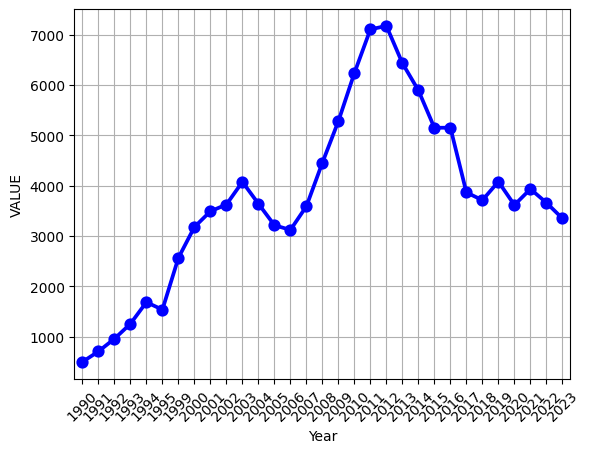

<Figure size 1000x600 with 0 Axes>

In [14]:
gráfica = sns.pointplot(x='Year', y='VALUE', data=hmcds_total, color='blue')

gráfica.set_xticklabels(gráfica.get_xticklabels(), rotation=45)

plt.grid(True)
plt.figure(figsize=(10,6))

plt.show()